<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


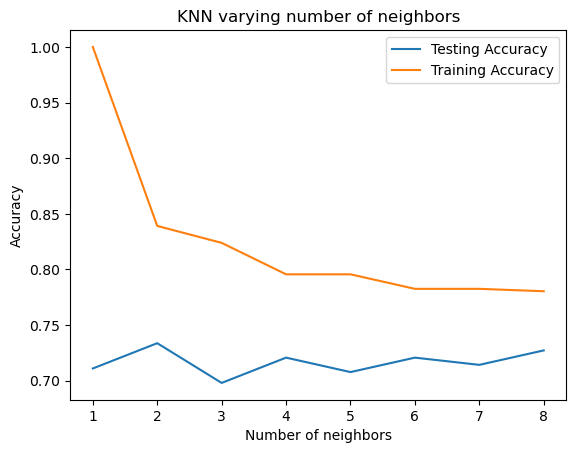

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



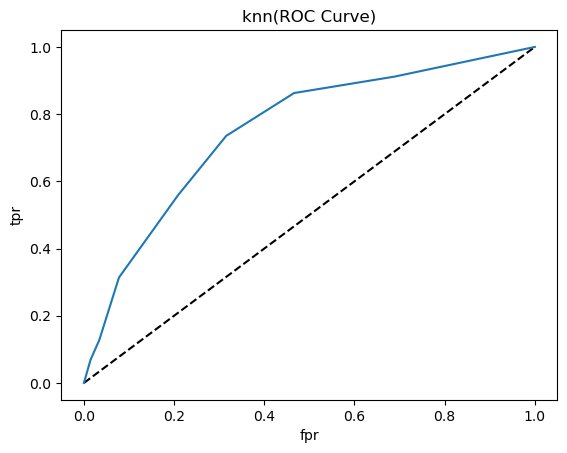

{'n_neighbors': 14}

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score
df=pd.read_csv("C:/Users/Desktop/AI_Practicals/diabetes.csv")
df.head()

df.tail()

df.info()

df.shape

x=df.drop('Outcome', axis=1).values
y=df['Outcome'].values
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate (neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
plt.title('KNN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)


knn.score=(x_test,y_test)
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
y_pred_proba=knn.predict_proba(x_test) [:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve (y_test,y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(ROC Curve)')
plt.show()

from sklearn.model_selection import GridSearchCV 
param_grid={'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV (knn, param_grid,cv=5)
knn_cv.fit(x,y)

knn_cv.best_score_

knn_cv.best_params_